[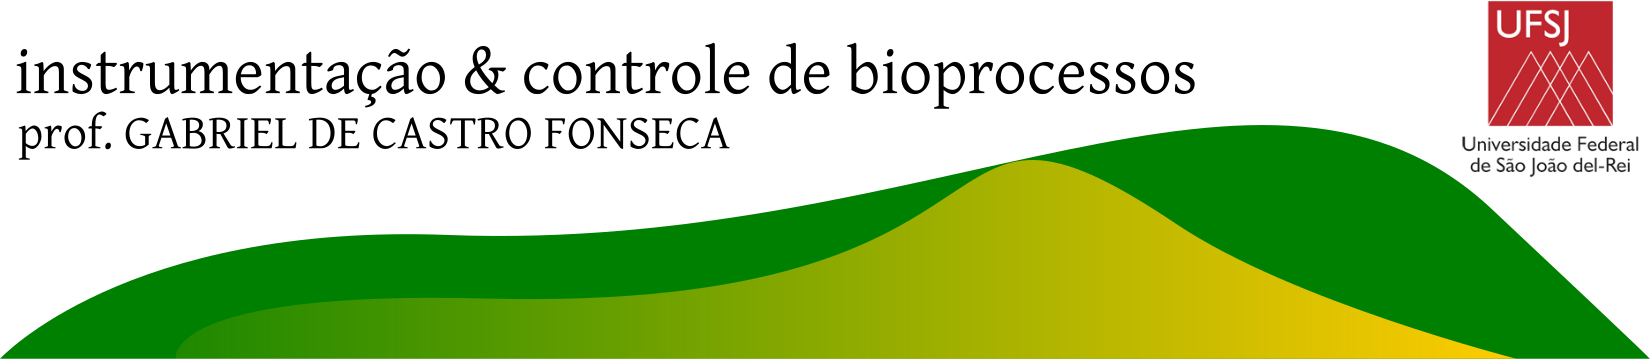](Aulas-Sumário.ipynb)

# Sistemas de Ordem Superior

*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Sistemas lineares de ordem $n$

Estudamos [nas últimas](primeira_ordem1.ipynb) [duas aulas](primeira_ordem2.ipynb) sistemas dinâmicos lineares de primeira ordem e como eles respondem a certos estímulos. Nesta aula vamos generalizar nossa discussão para sistemas lineares de ordem $n$ com equação geral

\begin{equation}
    a_n \frac{d^ny}{dt^n} + a_{n-1} \frac{d^{n-1}y}{dt^{n-1}} + \cdots + a_2 \frac{d^2y}{dt^2} + a_1 \frac{dy}{dt} + a_0 y = b_0 u
\end{equation}

Assim como no caso dos sistemas de primeira ordem, a solução desta equação diferencial tem uma parte homogênea e uma parte particular. A solução particular depende apenas da forma do estímulo e pode ser encontrada pelo método dos coeficientes indeterminados. Para encontrar a solução homogênea, vamos partir de um palpite: supondo que a solução homogênea contém um termo exponencial $y_H = e^{st}$ e substituindo-o na EDO homogênea,

\begin{gather*}
    a_n \frac{d^n}{dt^n}e^{st} + a_{n-1} \frac{d^{n-1}}{dt^{n-1}}e^{st} + \cdots + a_2 \frac{d^2}{dt^2}e^{st} + a_1 \frac{d}{dt}e^{st} + a_0 e^{st} =0 \\
    a_n s^n e^{st} + a_{n-1} s^{n-1} e^{st} + \cdots + a_2 s^2 e^{st} + a_1 s e^{st} + a_0 e^{st} = 0 \\[4mm]
    (a_n s^n + a_{n-1} s^{n-1} + \cdots + a_2 s^2 + a_1 s + a_0)e^{st} = 0
\end{gather*}

A função exponencial $e^{st}$ sempre tem valor maior que zero. Assim, a igualdade acima só pode ser satisfeita se o termo polinomial valer zero. Este termo é chamado de **polinômio característico**, $P(s)$, e as suas $n$ raízes, também chamadas de **polos** ou **raízes características** são todos o valores de $s$ que compõem a solução homogênea.

\begin{equation}
    y_H(t) = C_1 e^{s_1t} + C_2 e^{s_2t} + \cdots + C_{n-1}e^{s_{n-1}t} + C_n e^{s_nt}
\end{equation}

O polinômio característico é, portanto, a chave para encontrar a solução homogênea. O polinômio pode ser encontrado facilmente simplesmente substituindo-se cada derivada $\;\dfrac{d^iy}{dt^i}$ da EDO por um monômio de ordem equivalente $s^i$.

Os polos podem ser encontradas facilmente através de *softwares* computacionais, como Python, GNU Octave, Scilab, etc. 

### Exemplo 1 

Encontre a solução homogênea da equação diferencial

$$ 
    \frac{d^6y}{dt^6} + 13\frac{d^5y}{dt^5} + 70 \frac{d^4y}{dt^4} + 194 \frac{d^3y}{dt^3} + 277 \frac{d^2y}{dt^2} + 193\frac{dy}{dt} + 52y - 12\,{\rm sen}(8t) = 0
$$

### Solução 1

Observe que o termo $- 12\,{\rm sen}(8t)$ não depende de $y$. Embora ele esteja escrito do lado esquerdo da equação, esse termo é o estímulo. Para encontrar a solução homogênea devemos ignorá-lo.

O polinômio característico associado a essa EDO é

$$
    P(s) = s^6+13s^5+70s^4+194s^3+277s^2+193s+52
$$

As raízes características podem ser encontradas fazendo:

In [6]:
import sympy as sym # importa o pacote de cálculos simbólicos do Python
sym.init_printing() # imprime as fórmulas calculadas com formato LaTeX
  
s = sym.symbols('s') # define uma variável simbólica s
p = s**6 + 13*s**5 + 70*s**4 + 194*s**3 + 277*s**2 + 193*s + 52 # define polinômo a partir de s
sym.factor(p, extension = sym.I) # fatora o polinômio. extension = sym.I permite fatores complexos

As raízes do polinômio são:
- $-1\;$ (três vezes) 
- $-4\;$ (uma vez) 
- $-3+2j\;$ (uma vez)
- $-3-2j\;$ (uma vez).

No total o polinômio tem seis raízes: uma tripla e três únicas. As raízes únicas, sejam elas reais ou complexas, podem ser transpostas diretamente para a solução homogênea. Falaremos sobre as raízes múltiplas mais tarde, por enquanto vamos representá-las pela função $f(e^{-t})$.

\begin{gather*}
    y_H(t) = C_1 e^{-4t} + C_2 e^{-(3+2j)t} + C_3 e^{-(3-2j)t} + f(e^{-t}) \\
    y_H(t) = C_1 e^{-4t} + e^{-3t}(C_2 e^{-2jt} + C_3 e^{2jt}) + f(e^{-t})
\end{gather*}

O significado dos termos exponenciais $\;e^{-4t}$, $\;e^{-3t}$ e $\;e^{-t}$ é evidente. As exponenciais de números imaginários $\;e^{\pm 2jt}$ são mais intrigantes, todavia.

A [fórmula de Euler](https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_Euler) nos permite definir as funções seno e cosseno como

\begin{gather*}
    {\rm sen}(x) = \frac{e^{jx}-e^{-jx}}{2j} \\
    \cos(x) = \frac{e^{jx}+e^{-jx}}2
\end{gather*}

Podemos verificar essa identidade plotando ambas as funções em um gráfico.

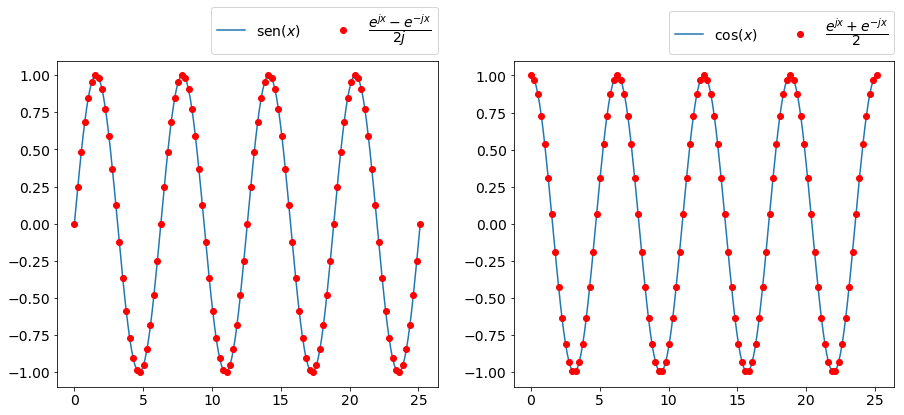

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (( np.exp(1j*x) - np.exp(-1j*x) )/2j).real

def g(x):
    return ( np.exp(1j*x) + np.exp(-1j*x) ).real/2

π = np.pi
x = np.linspace(0,8*π,201)
y = np.linspace(0,8*π,101)

plt.rcParams["figure.figsize"]=[15,6]
plt.rcParams.update({'font.size': 14})
plt.subplot(1,2,1)
plt.plot(x,np.sin(x),label=r"${\rm sen}(x)$")
plt.plot(y,f(y),'ro',label=r"$\dfrac{e^{jx}-e^{-jx}}{2j}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

plt.subplot(1,2,2)
plt.plot(x,np.cos(x),label=r"$\cos(x)$")
plt.plot(y,g(y),'ro',label=r"$\dfrac{e^{jx}+e^{-jx}}{2}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
           ncol=2, borderaxespad=0.)

As exponenciais de números imaginários na solução homogênea se tornam, portanto, funções seno e cosseno. Isso confere um caráter oscilatório para a resposta.

$$
    y_H(t) = C_1 e^{-4t} + e^{-3t}(D_1 {\rm sen}2t + D_2 \cos 2t) + f(e^{-t})
$$

Agora só nos resta estudar as raízes múltiplas do polinômio característico. A raiz $s=-1$ aparece com multiplicidade $3$ em nosso exemplo.

Raízes múltiplas, reais ou complexas, obviamente só podem gerar um único termo exponencial, neste caso $e^{-1\cdot t}$. No entanto, a solução homogênea de uma equação diferencial de $n$-ésima ordem necessariamente contém $n$ termos linearmente independentes.

Os termos adicionais aparecem na forma de um polinômio em $t$ que multiplica o termo exponencial associado ao polo múltiplo. Seja $m$ a multiplicidade de uma raiz, esse polinômio em $t$ deve ter ordem $m-1$.

No nosso caso, onde $\;m=3$:

$$
    f(e^{-t}) = (k_0 + k_1 t + k_2 t^2) e^{-t}
$$

A solução homogênea completa do nosso problema é 

$$
    y_H(t) = C_1 e^{-4t} + e^{-3t}(D_1 {\rm sen}2t + D_2 \cos 2t) + (k_0 + k_1 t + k_2 t^2) e^{-t}
$$

As seis constantes de integração da solução podem ser calculadas aplicando-se as condições iniciais após a solução particular ser encontrada. Para variáveis que representam desvios, $y(0) = \left.\dfrac{dy}{dt}\right|_0 = \cdots = \left.\dfrac{d^{n-1}y}{dt^{n-1}}\right|_0 = 0$.

## Estabilidade

Observe que no exemplo resolvido acima, todos os termos exponenciais têm argumentos negativos. Isso é consequência de a parte real de todas as raízes características do sistema serem negativas (a parte imaginária se torna o argumento das funções seno e cosseno). Por consequência, a componente homogênea da resposta do sistema decai exponencialmente até praticamente desaparecer e apenas a solução particular tem um efeito permanente.

Seria perfeitamente possível, entretanto, que pelo menos uma das raízes características tivesse parte real positiva. Nesse caso a resposta homogênea tenderia a infinito, aumentando indefinidamete o valor da variável resposta. Esse comportamento caracteriza um sistema instável.

Pode-se concluir, portanto, que um sistema é estável (ou autorregulável) se todos os polos do polinômio característico tiverem parte real menor ou igual a zero. 

Outra definição é que um sistema é estável se, sob efeito de um estímulo limitado, sua resposta permanente também é limitada. Observe que a rampa não é um estímulo limitado e por isso não pode ser usada como teste de estabilidade.

### Exemplo 2

Uma população de 100 microrganismos é inoculada em uma placa de Petri. A velocidade específica de crescimento de uma população de microrganismos é $\mu = 0,05\rm\,min^{-1}$. Modele o crescimento dessa população ao longo do tempo. 

### Solução 2

O crescimento de uma população de microrganismos $X$ em um dado tempo é proporcional à população de microrganismos no mesmo momento. A velocidade específica de crescimento é a constante de proporcionalidade.

$$
    \frac{dX}{dt} = \mu X + F_X(t) \\
$$

Onde $F_X(t)$ é a taxa de inoculação de microrganismos.

Esse sistema está em estado estacionário quando $X^*=0$ e $F_X^* = 0$, isto é, quando a população na placa de Petri é nula e nenhum microrganismo é inoculado. Sejam $y = X-X^*$, $u = F_X - F_X^*$, $\tau = \dfrac{1}{\mu}$ e $K=\tau$:

\begin{gather*}
    \frac{dy}{dt} = \frac{1}{\tau}y + u \\
    \tau \frac{dy}{dt} - y = Ku
\end{gather*}

Este é um [sistema de primeira ordem](primeira_ordem1.ipynb), mas ele não é capacitivo e nem integrador. Trata-se de um sistema instável.

É possível encontrar a solução homogênea de sistemas de primeira ordem usando o procedimento mostrado nesta aula. Neste caso, o polinômio característico é de primeira ordem e tem solução trivial:

\begin{gather*}
    P(s) = \tau s - 1 \\
    \implies s = \frac{1}{\tau} \\
    \implies y_H(t) = Ce^{t/\tau}
\end{gather*}

Vamos considerar que o estímulo aplicado sobre o sistema é um impulso de magnitude $a=100$. Assumindo que a resposta ao impulso para o sistema instável é análoga à resposta capacitiva, estudada [na última aula](primeira_ordem2.ipynb),

\begin{gather*}
    y(t) = \frac{aK}{\tau}e^{t/\tau} \\
    y(t) = 100\cdot e^{0,05t}
\end{gather*}

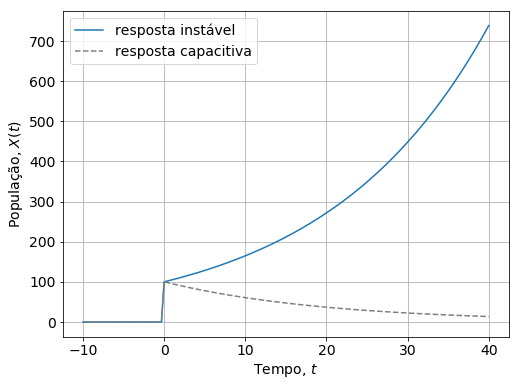

In [2]:
%matplotlib inline

t = np.linspace(-10,40,151)
y = np.where( t >= 0, 100*np.exp(0.05*t), 0 )
z = np.where( t >= 0, 100*np.exp(-0.05*t), 0 )

plt.rcParams["figure.figsize"]=[8,6]
plt.rcParams.update({'font.size': 14})
plt.plot(t,y, label="resposta instável")
plt.plot(t,z, color = "grey", linestyle = "--", label="resposta capacitiva")
plt.ylabel("População, $X(t)$")
plt.xlabel("Tempo, $t$")
plt.grid()
plt.legend()

Obviamente o crescimento microbiano não poderia continuar exponencialmente para sempre. Em algum momento o substrato acabaria ou metabólitos tóxicos se acumulariam na placa de Petri e a população se estagnaria.

No mundo real nenhum sistema é completamente instável, nossos modelos é que são incompletos e podem não identificar outros pontos de equilíbiro. Mas na prática um sistema é considerado instável se pequenos estímulos levarem a variável resposta para muito longe do valor desejado.

### Exercício

Encontre a solução homogênea e diga se os seguintes sistemas são estáveis ou instáveis.

1. $\quad36\dfrac{d^2y}{dt^2} + 13\dfrac{dy}{dt} + y = 10u(t)$
2. $\quad50\dfrac{d^2y}{dt^2} + 16\dfrac{dy}{dt} + 2y = -3u(t)$
3. $\quad4\dfrac{d^2y}{dt^2} - 4\dfrac{dy}{dt} + y = u(t)$

### Solução

In [180]:
p  = [36*s**2 + 13*s + 1]
p += [50*s**2 + 16*s + 2]
p += [4*s**2 - 4*s + 1]

for i, poli in enumerate(p):
    raizes = sym.roots(poli)
    print(f"\nExercício {i+1}:")
    for r in raizes.keys():
        print(" ",r)


Exercício 1:
  -1/4
  -1/9

Exercício 2:
  -4/25 - 3*I/25
  -4/25 + 3*I/25

Exercício 3:
  1/2


## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulos 5 e 7.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. PHI Learning. Capítulo 3.
* C. Garcia (2017). Controle de Processos Industriais: Estratégias Convencionais. Volume 1, Blucher. Capítulo 3.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3 a ed. LTC. Capítulo 4.
* J.C. Kantor (2019). [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/). Capítulo 3.